In [1]:
import psycopg2
import os
import csv
import pandas as pd
import re

def chemin_fichier()-> str :
    """
        Donne le nom du chemin complet du fichier actuel (.py) 
    """
    chemin=os.getcwd() #methode pour tourner avec jupyter
    #chemin= path.dirname(path.abspath(__file__)) #methode d'Alice avec <os>
    #chemin = str(Path(__file__).parent) #ma methode avec <path>
    #print(chemin)
    return chemin

# etablir une connection
def connexion_DB(fichierDB):
    try:
        conn = psycopg2.connect(user = "santa",
                                password = "claus",
                                host = "localhost",
                                port = "5432:5432",
                                database = fichierDB
                                )

        cur = conn.cursor()
        # Print PostgreSQL Connection properties
        #print ( "Proprietes : ",conn.get_dsn_parameters(),"\n")

        # Print PostgreSQL version
        cur.execute("SELECT version();")
        record = cur.fetchone()
        #print("Version de PostgreSQL : ", record,"\n")
        cur.close()
    except (Exception, psycopg2.Error) as error :
        print ("Error while connecting to PostgreSQL", error)
    
    return conn

def deconnexion_DB(conn):
#closing database connection.
    if(conn):
        conn.close()
        print("PostgreSQL connection is closed")


In [2]:
#les enfants par pays
conn=connexion_DB("santa_data")
cursor = conn.cursor()
rq_select_total='''
          SELECT 
              count(TE.ID_e)
          FROM T_enfants as TE
          where age < 18 and TE.id_p is not null
          group by id_e
          ;
          '''

cursor.execute(rq_select_total)
res=cursor.fetchall()
nbe_tot=cursor.rowcount

rq_select='''
          SELECT 
              count(TE.ID_p),pays
          FROM T_enfants as TE join T_pays as TP on TE.id_p=TP.id_p
          where age < 18 and TE.id_p is not null
          group by pays
          ORDER BY pays;
          '''

cursor.execute(rq_select)
res=cursor.fetchall()

print(" NOMBRE D'ENFANTS DE MOINS DE 18 ANS PAR PAYS :",nbe_tot)
print('                  PAYS'.rjust(15),'      NB_inf 18 ans'.ljust(8))
for row in res:  
    print(str(row[1])[0:30].rjust(25),'       ',end='')
    print(str(row[0]).ljust(8))
    
cursor.close()
deconnexion_DB(conn)

 NOMBRE D'ENFANTS DE MOINS DE 18 ANS PAR PAYS : 1534
                  PAYS       NB_inf 18 ans
           Afrique du Sud        1       
                Allemagne        8       
                  Andorre        1       
                 Autriche        1       
                 Belgique        22      
                    Bénin        1       
                 Bulgarie        1       
                   Canada        246     
                  Espagne        3       
               États-Unis        1       
                   France        1192    
          Grande-Bretagne        3       
                    Grèce        1       
               Guadeloupe        4       
         Guyane française        3       
                    Haïti        2       
                   Italie        4       
                    Liban        3       
               Luxembourg        2       
                    Maroc        2       
               Martinique        3       
                  Maur

In [3]:
#lles adultes par pays
conn=connexion_DB("santa_data")
cursor = conn.cursor()
rq_select_total='''
          SELECT 
              count(TE.ID_e)
          FROM T_enfants as TE
          where age >= 18 and TE.id_p is not null
          group by id_e
          ;
          '''

cursor.execute(rq_select_total)
res=cursor.fetchall()
nbe_tot1=cursor.rowcount
rq_select='''
          SELECT 
              count(TE.ID_p),pays
          FROM T_enfants as TE join T_pays as TP on TE.id_p=TP.id_p
          where age >= 18 and TE.id_p is not null
          group by pays
          ORDER BY pays;
          '''

cursor.execute(rq_select)
res_1=cursor.fetchall()
print("         NOMBRE D'ADULTES PAR PAYS :",nbe_tot1)
print('                  PAYS'.rjust(15),'      NB_adultes'.ljust(8))
for row in res_1:  
    print(str(row[1])[0:30].rjust(25),'       ',end='')
    print(str(row[0]).ljust(8))
    
cursor.close()
deconnexion_DB(conn)

         NOMBRE D'ADULTES PAR PAYS : 89
                  PAYS       NB_adultes
       Antigua-et-Barbuda        1       
                 Belgique        3       
                   Canada        18      
                   France        60      
                    Liban        1       
                  Pologne        1       
                  Réunion        1       
                 Roumanie        1       
                  Sénégal        1       
                   Suisse        1       
                  Uruguay        1       
PostgreSQL connection is closed


In [4]:
# liste lettres adultes
liste_let=[]
i = 0
while i < 11:
    liste_let.append(res_1[i][0])
    i = i + 1
    
print(liste_let)

[1, 3, 18, 60, 1, 1, 1, 1, 1, 1, 1]


In [5]:
#liste pays adultes
liste_pays=[]
j = 0
while j < 11:
    liste_pays.append(res_1[j][1])
    j = j + 1
print(liste_pays)   


['Antigua-et-Barbuda', 'Belgique', 'Canada', 'France', 'Liban', 'Pologne', 'Réunion', 'Roumanie', 'Sénégal', 'Suisse', 'Uruguay']


                      NOMBRES D'ADULTES PAR PAYS: 


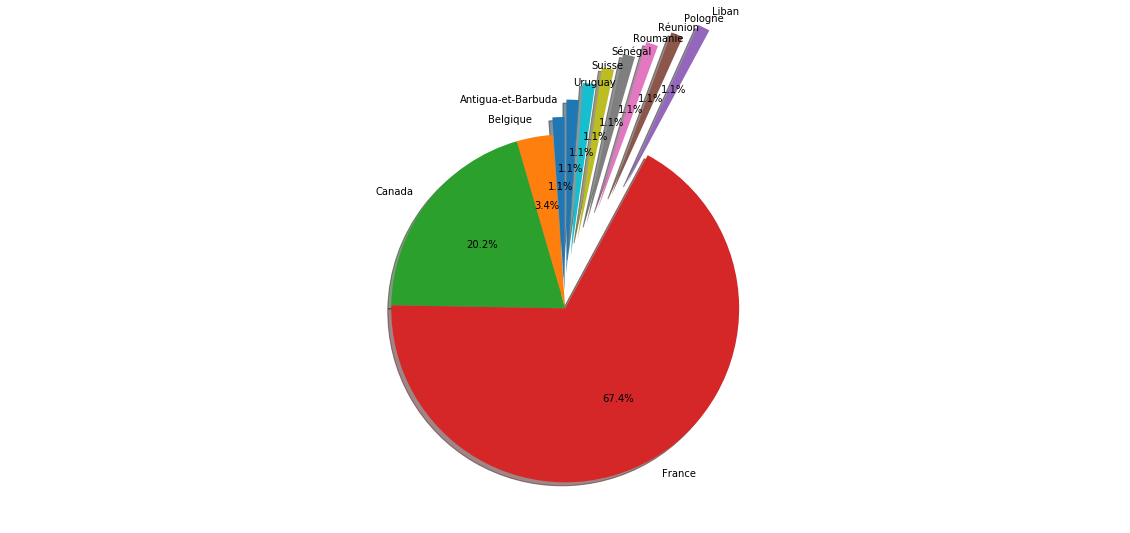

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#name = ['Afrique du Sud','Allemagne','Andorre','Antigua-et-Barbuda','Autriche','Belgique','Bénin','Bulgarie','Canada','Espagne','États-Unis','France','Grande-Bretagne','Grèce','Guadeloupe','Guyane française','Haïti','Italie','Liban','Luxembourg','Maroc','Martinique','Maurice','Oman','Pakistan','Pays-Bas','Pologne','Portugal','Réunion','Roumanie','Saint-Pierre et Miquelon','Sénégal','Suisse','Tunisie','Turquie','Uruguay']
#data = [1,7,1,1,1,27,1,1,267,3,2,1249,3,1,4,3,2,4,4,2,2,3,1,1,1,1,5,2,9,2,1,2,9,1,1,1]
name = liste_pays
data = liste_let
print("                      NOMBRES D'ADULTES PAR PAYS: ")
#ax3 = plt.subplot(288)
fig = plt.figure(figsize=(20, 8))
plt.axis('equal')
explode=(0.1,0,0,0,0.8,0.7,0.6,0.5,0.4,0.3,0.2)
plt.pie(data, explode=explode, labels=name, autopct='%1.1f%%', startangle=90, shadow=True)

#ax3.margins(x=-0.49, y=-0.49)1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.5,0.5,0.5
plt.show()


In [10]:
conn=connexion_DB("santa_data")
cursor = conn.cursor()
rq_select_total='''
          SELECT 
              count(TE.ID_e)
          FROM T_enfants as TE
          where age < 18 and TE.id_p is not null
          group by id_e
          ;
          '''

cursor.execute(rq_select_total)
res=cursor.fetchall()
nbe_tot=cursor.rowcount

rq_select='''
          SELECT 
              count(TE.ID_p),pays
          FROM T_enfants as TE join T_pays as TP on TE.id_p=TP.id_p
          where age < 18 and TE.id_p is not null
          group by pays
          ORDER BY pays;
          '''

cursor.execute(rq_select)
res=cursor.fetchall()

print(" NOMBRE D'ENFANTS PAR PAYS :",nbe_tot)
print('                  PAYS'.rjust(15),'      NB_inf 18 ans'.ljust(8))
for row in res:  
    print(str(row[1])[0:30].rjust(25),'       ',end='')
    print(str(row[0]).ljust(8))

 NOMBRE D'ENFANTS PAR PAYS : 1534
                  PAYS       NB_inf 18 ans
           Afrique du Sud        1       
                Allemagne        8       
                  Andorre        1       
                 Autriche        1       
                 Belgique        22      
                    Bénin        1       
                 Bulgarie        1       
                   Canada        246     
                  Espagne        3       
               États-Unis        1       
                   France        1192    
          Grande-Bretagne        3       
                    Grèce        1       
               Guadeloupe        4       
         Guyane française        3       
                    Haïti        2       
                   Italie        4       
                    Liban        3       
               Luxembourg        2       
                    Maroc        2       
               Martinique        3       
                  Maurice        1       

NOMBRE D'ENFANTS PAR PAYS :


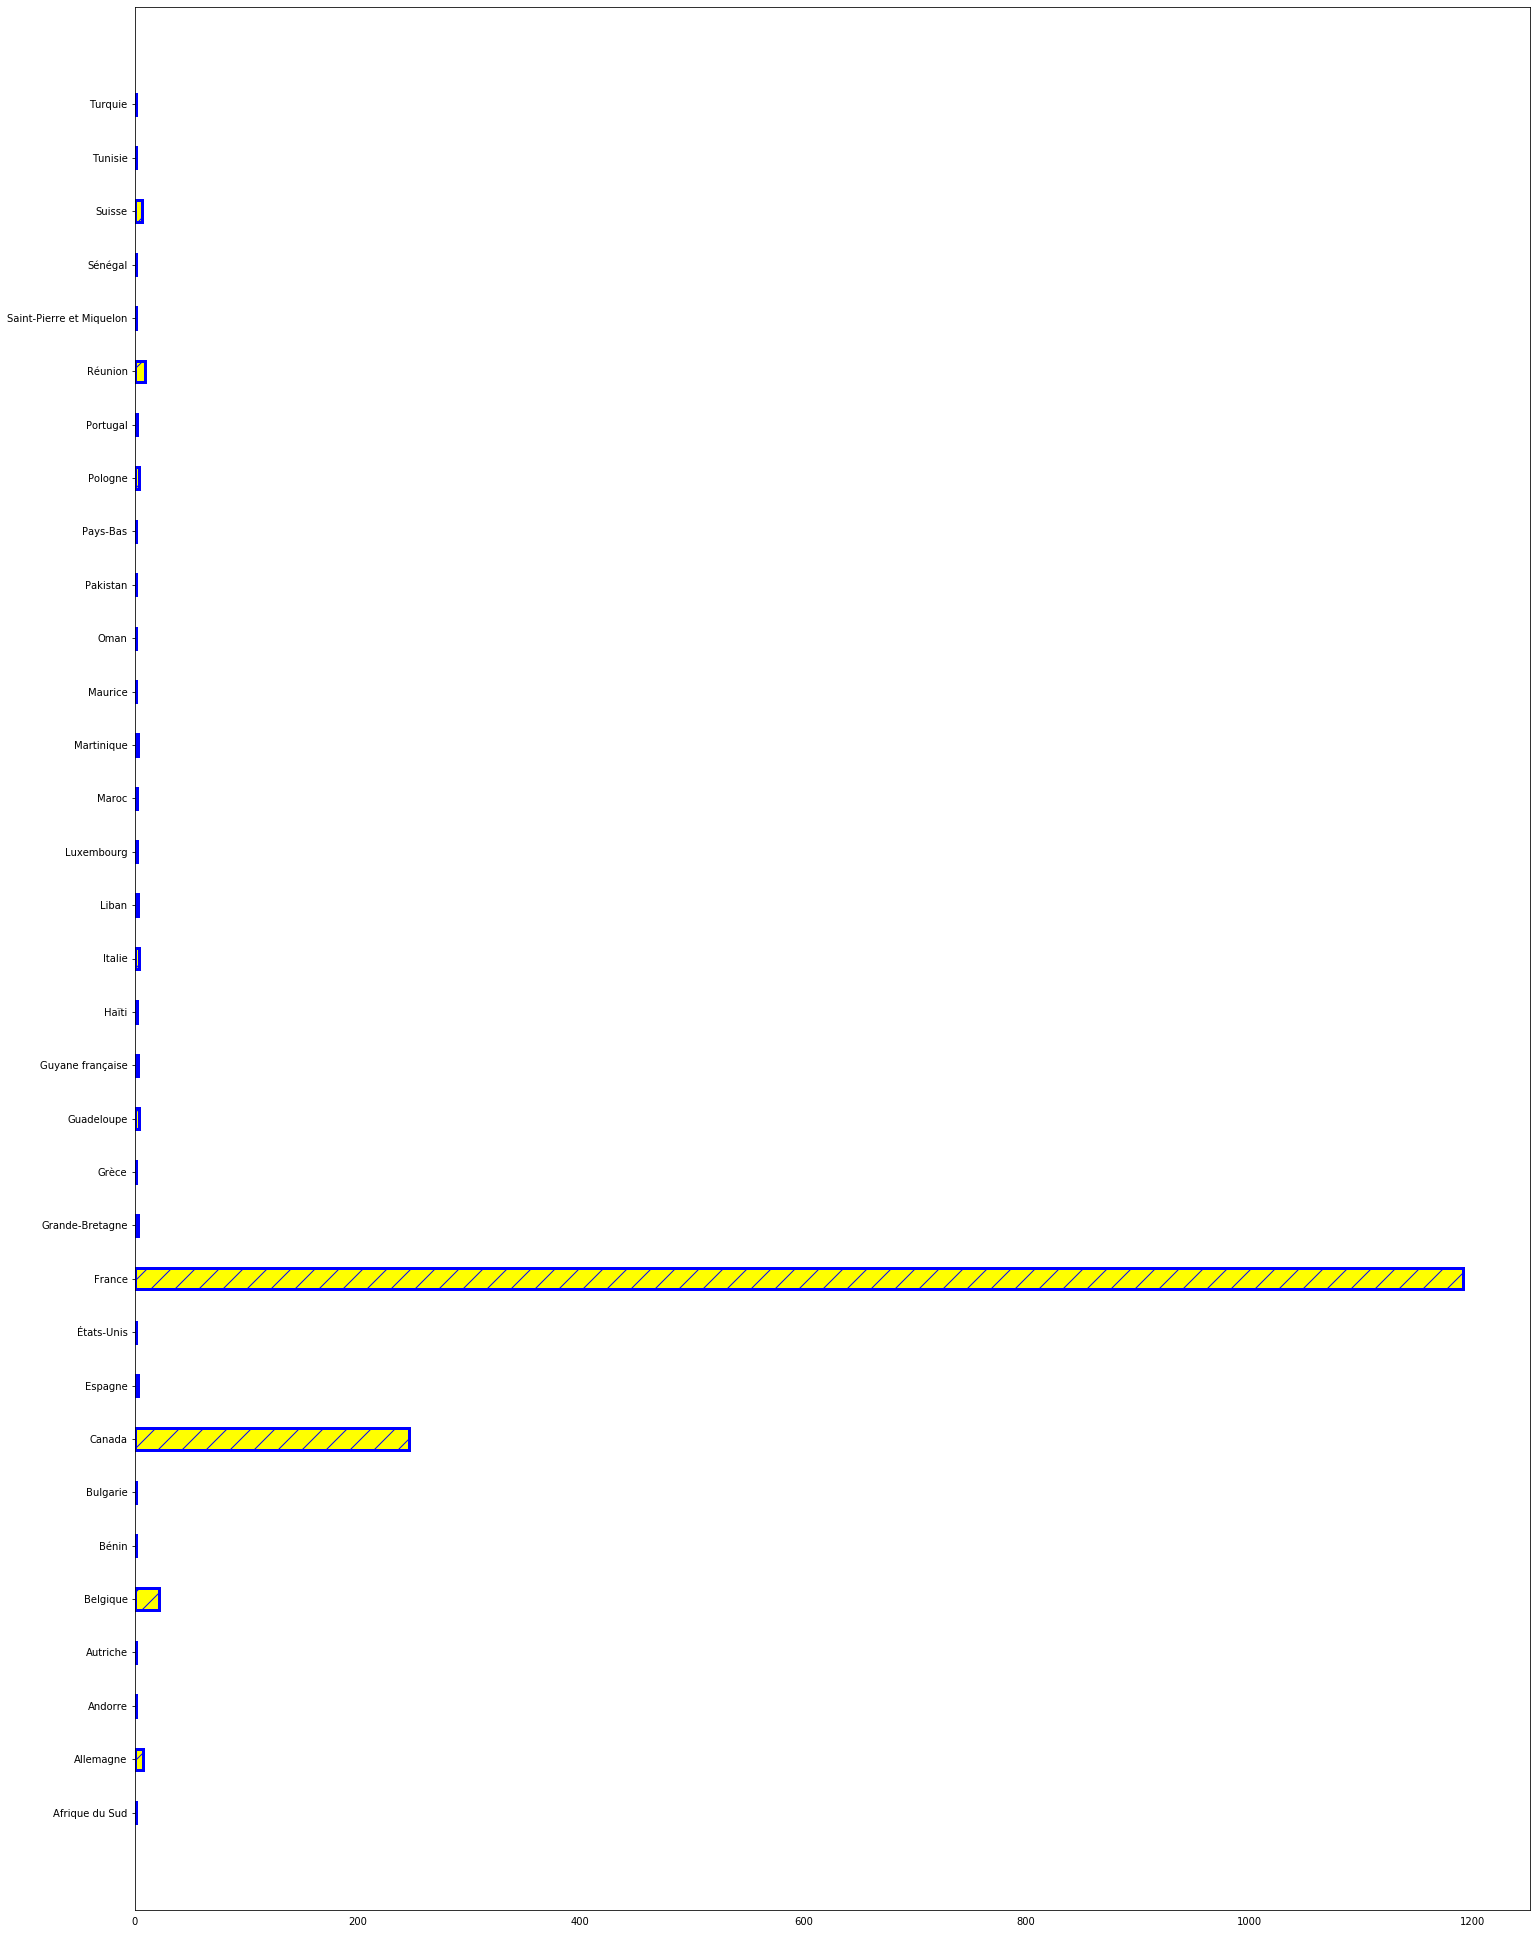

In [11]:
print("NOMBRE D'ENFANTS PAR PAYS :")

nb_p_df=pd.read_sql_query ( rq_select , conn , index_col = None , coerce_float = True ,
                            params = None , parse_dates = None , chunksize = None )
r = range(len(nb_p_df))

fig=plt.figure(figsize=(25,35))
barWidth = 0.4

plt.barh(r, nb_p_df['count'], height = barWidth, color = ['yellow' for i in nb_p_df['count']],\
           edgecolor = ['blue' for i in nb_p_df['count']], linestyle = 'solid', hatch ='/',linewidth = 3)

plt.yticks(range(len(nb_p_df['count'])), nb_p_df['pays'])
#Dans un barplot, pour supprimer les ticks sur l'axe des x (tout en conservant les labels) : faire 
plt.gca().axes.xaxis.set_ticks_position('none')

plt.show() 